In [1]:
from goobergrad import nn
from goobergrad import eval
from goobergrad.nn import Value
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


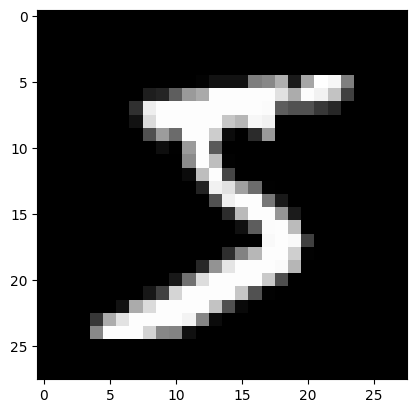

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
b = np.zeros((train_labels.size, train_labels.max()+1))
b[np.arange(train_labels.size), train_labels] = 1
train_labels = b

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# model definition

In [16]:
model = nn.MLP([784, 100, 100, 10])

ypred = model(train_images[0])
ypred = nn.softmax(ypred)


[Value(-0.02983606885324891),
 Value(0.1440988932387099),
 Value(-0.02762800244817617),
 Value(-0.045730675453074174),
 Value(0.24487794349452044),
 Value(-0.10320296858575063),
 Value(-0.08157225589999545),
 Value(-0.05749312076262845),
 Value(-0.02072426385184617),
 Value(-0.21975137268552558)]

# training


In [13]:
import random

In [14]:
def random_batch(images, labels, batch_size):
    indexes = [random.randint(0, labels.shape[0]-1) for _ in range(batch_size)]
    for i in indexes:
        yield (images[i], labels[i])


In [15]:
for image, label in random_batch(train_images, train_labels, 150):
    model.zero_grad()
            
    ypred = model(image)
    ypred = nn.softmax(ypred)
    loss = eval.CrossEntropy(ypred, label)
    before = loss.data
    
    loss.backward()
    model.step(.005)
    print(f'ypred{ypred}\n loss {loss}')
    

ypred[Value(0.0972363361848978), Value(0.10701255082575235), Value(0.10457491167519167), Value(0.08022575508476082), Value(0.08766171088501648), Value(0.11263740200188582), Value(0.11396091728647197), Value(0.13239528822125707), Value(0.07085970751136018), Value(0.0934354203234058)]
 loss Value(0.9805724935557765)
ypred[Value(0.09262932497450273), Value(0.10358485091380296), Value(0.11369402853156092), Value(0.07863288898604819), Value(0.11276686761093123), Value(0.11801683662664858), Value(0.10435248483507334), Value(0.11561020804474177), Value(0.06917731264331682), Value(0.09153519683337337)]
 loss Value(0.9280560305545268)
ypred[Value(0.10107606168515085), Value(0.0969853749023302), Value(0.10741611449103118), Value(0.08283931682259642), Value(0.10093583711969613), Value(0.119097885492693), Value(0.10038945080924605), Value(0.12264432264989789), Value(0.0810349008372711), Value(0.08758073519008713)]
 loss Value(0.9959546107696212)
ypred[Value(0.09464832699185091), Value(0.1080183960

ValueError: math domain error